In [1]:
import matplotlib.pyplot as plt
import torch
import h5py
import os

In [8]:
from torchvision.transforms.functional import center_crop 

In [18]:
import numpy as np
import random

In [4]:
csm_path = "/echo/allgemein/projects/Open Source MRI/Data/csm_reconstructed/gpu/brain_multicoil_train/"
rss_path = "/home/global/mri_datasets/fastmri/brain_multicoil_train/"

In [23]:
files = os.listdir(csm_path)

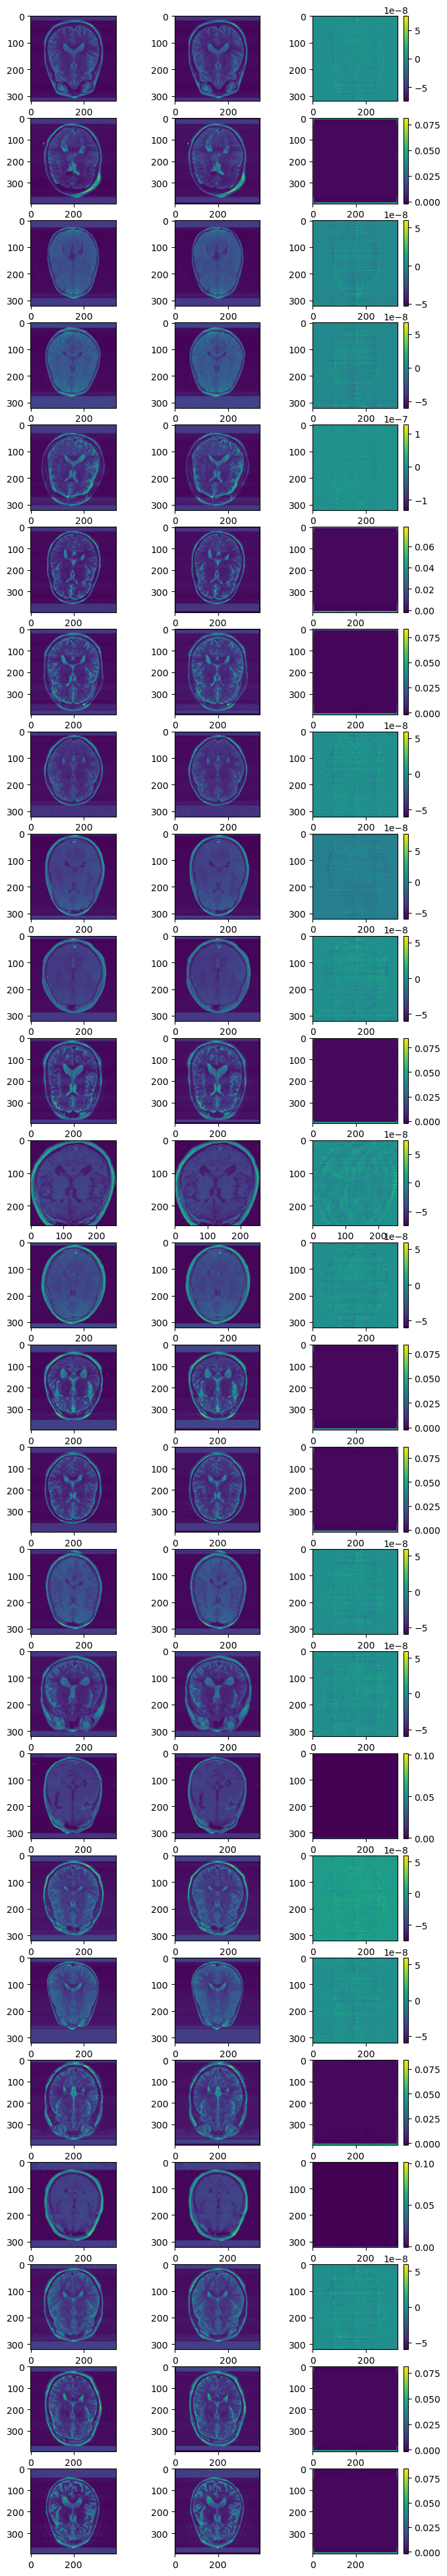

In [27]:
rows = 25
f = plt.figure(figsize=(8, 2*rows))
axs = f.subplots(rows, 3)
for axis, file in zip(axs, random.sample(files, rows)):
    file_full = os.path.join(csm_path, file)
    rss_path_full = os.path.join(rss_path, file)
    data = torch.from_numpy(h5py.File(file_full)["reconstruction_smap"][:][0])
    shape = (min(data.shape), min(data.shape))
    crop = lambda x: center_crop(x, output_size=shape)
    data_crop = crop(data)
    data_norm = torch.nn.functional.normalize(data_crop.abs())
    axis[0].imshow(data_norm)
    
    data_rss = crop(torch.from_numpy(h5py.File(rss_path_full)["reconstruction_rss"][:])[0])
    data_rss_norm = torch.nn.functional.normalize(data_rss.abs())
    axis[1].imshow(data_rss_norm)
    im = axis[2].imshow(data_norm - data_rss_norm)
    plt.colorbar(im, ax=axis[2])